Name: Syalista Galuh Nadira

Student ID: 2702346361

Class: LF09

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import cosine_similarity

### 1. Exploratory Data Analysis (EDA)

In [2]:
df3 = pd.read_csv("3A.tsv", delimiter="\t")

df3.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [3]:
df3.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,Aliens: Colonial Marines,PS3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,-170.0,NaN,NaN


In [4]:
df3.shape

(16928, 17)

In [5]:
df3.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

Based on my thinking, the variables .. do not play a significant role in clustering customers to identify what kind of product promotions would be suitable for them. Therefore, I will drop these columns.

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

In [7]:
df3['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
df3['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Impute missing values**

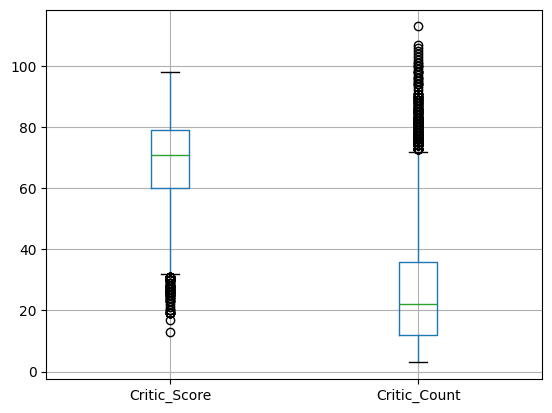

In [9]:
df3.boxplot(column=['Critic_Score', 'Critic_Count'])
plt.show()

In [10]:
df3['Critic_Score'].median()

71.0

In [11]:
df3['Critic_Count'].median()

22.0

In [12]:
df3['Critic_Score'].fillna(71, inplace=True)
df3['Critic_Count'].fillna(22, inplace=True)

/tmp/ipython-input-4251491455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Critic_Score'].fillna(71, inplace=True)
/tmp/ipython-input-4251491455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [13]:
df3['Name'].fillna(df3['Name'].mode()[0], inplace=True)
df3['Genre'].fillna(df3['Genre'].mode()[0], inplace=True)
df3['Publisher'].fillna(df3['Publisher'].mode()[0], inplace=True)
df3['User_Score'].fillna(df3['User_Score'].mode()[0], inplace=True)
df3['Developer'].fillna(df3['Developer'].mode()[0], inplace=True)
df3['Rating'].fillna(df3['Rating'].mode()[0], inplace=True)

/tmp/ipython-input-972639541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Name'].fillna(df3['Name'].mode()[0], inplace=True)
/tmp/ipython-input-972639541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16928 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16928 non-null  object 
 5   Publisher        16928 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     16928 non-null  float64
 12  Critic_Count     16928 non-null  float64
 13  User_Score       16928 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        16928 non-null  object 
 16  Rating           16928 non-null  object 
dtypes: float64(8

Variable User_Score has an incorrect type of data, it should be integer, but it is listed as object.

In [15]:
df3['User_Score'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: 'tbd'

In [16]:
df3[df3['User_Score']=='tbd']

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,22.0,tbd,-706.0,Ubisoft,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,22.0,tbd,-92.0,Ubisoft,E
5,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,22.0,tbd,-397.0,Ubisoft,E
9,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,22.0,tbd,-273.0,Ubisoft,E
10,10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,71.0,22.0,tbd,-222.0,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16912,16912,Game & Watch Gallery 4,GBA,2002,Misc,Nintendo,0.43,0.16,0.00,0.01,0.61,71.0,22.0,tbd,-972.0,Ubisoft,E
16916,16916,Cabela's Monster Buck Hunter,Wii,2010,Sports,Activision,0.57,0.00,0.00,0.03,0.61,71.0,22.0,tbd,-509.0,FUN Labs,T
16918,16918,Dark Souls II,PS4,2015,Role-Playing,Namco Bandai Games,0.21,0.23,0.08,0.09,0.60,71.0,22.0,tbd,-747.0,Ubisoft,E
16919,16919,Monster Trucks,GBA,2004,Racing,Majesco Entertainment,0.43,0.16,0.00,0.01,0.60,71.0,22.0,tbd,-320.0,Skyworks Technologies,E


In [17]:
# Replacing 'tbd' with NaN
df3['User_Score'] = pd.to_numeric(df3['User_Score'], errors='coerce')

In [18]:
df3['User_Score'].median()

7.5

In [19]:
df3['User_Score'].fillna(7.5, inplace=True)

/tmp/ipython-input-657067654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['User_Score'].fillna(7.5, inplace=True)


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16928 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16928 non-null  object 
 5   Publisher        16928 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     16928 non-null  float64
 12  Critic_Count     16928 non-null  float64
 13  User_Score       16928 non-null  float64
 14  User_Count       16928 non-null  float64
 15  Developer        16928 non-null  object 
 16  Rating           16928 non-null  object 
dtypes: float64(9

**Encoding categorical values**

In [21]:
print(df3['Platform'].value_counts())

Platform
PS2     2188
DS      2164
PS3     1359
Wii     1337
X360    1280
PSP     1216
PS      1214
PC       982
GBA      839
XB       832
GC       564
3DS      530
PSV      436
PS4      399
N64      325
XOne     253
SNES     242
SAT      175
WiiU     148
2600     136
GB        99
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [22]:
onehot_3 = OneHotEncoder()

platform_counts = df3['Platform'].value_counts()

# threshold : keep platforms with at least 1000 occurrences
threshold = 1000

# Replace less frequent platforms with 'Others'
df3['Platform'] = df3['Platform'].apply(lambda x: x if platform_counts[x] >= threshold else 'Others')

df_Platform_enc = pd.DataFrame(onehot_3.fit_transform(df3[['Platform']]).toarray(), columns=onehot_3.get_feature_names_out())

df3 = df3.reset_index()

df3 = pd.concat([df3, df_Platform_enc], axis=1)


In [23]:
print(df3['Genre'].value_counts())

Genre
Action          3412
Sports          2380
Misc            1773
Role-Playing    1519
Shooter         1347
Adventure       1313
Racing          1266
Platform         904
Simulation       880
Fighting         863
Strategy         689
Puzzle           582
Name: count, dtype: int64


In [24]:
onehot3 = OneHotEncoder()

platform_counts = df3['Genre'].value_counts()

# threshold : keep genres with at least 1300 occurrences
threshold = 1300

# Replace less frequent genre with 'Others'
df3['Genre'] = df3['Genre'].apply(lambda x: x if platform_counts[x] >= threshold else 'Others')

df_Genre_enc = pd.DataFrame(onehot3.fit_transform(df3[['Genre']]).toarray(), columns=onehot3.get_feature_names_out())

df3 = df3.drop(columns=['level_0', 'index'], errors='ignore')

df3 = df3.reset_index()

df3 = pd.concat([df3, df_Genre_enc], axis=1)


In [25]:
print(df3['Publisher'].value_counts())

Publisher
Electronic Arts                 1444
Activision                      1003
Namco Bandai Games               952
Ubisoft                          948
Konami Digital Entertainment     839
                                ... 
UIG Entertainment                  1
Takuyo                             1
Interchannel-Holon                 1
Naxat Soft                         1
EON Digital Entertainment          1
Name: count, Length: 581, dtype: int64


In [26]:
one_hot3 = OneHotEncoder()

platform_counts = df3['Publisher'].value_counts()

threshold = 839

df3['Publisher'] = df3['Publisher'].apply(lambda x: x if platform_counts[x] >= threshold else 'Others')

df_Publisher_enc = pd.DataFrame(one_hot3.fit_transform(df3[['Publisher']]).toarray(), columns=one_hot3.get_feature_names_out())

df3 = df3.reset_index()

df3 = pd.concat([df3, df_Publisher_enc], axis=1)

In [27]:
print(df3['Developer'].value_counts())

Developer
Ubisoft                            6894
EA Sports                           177
EA Canada                           171
Konami                              163
Capcom                              140
                                   ... 
Beenox, Other Ocean Interactive       1
JV Games Inc.                         1
Ubisoft, Moss                         1
Pam Development, 2K Sports            1
Trilobyte                             1
Name: count, Length: 1696, dtype: int64


In [28]:
oneHot3 = OneHotEncoder()

platform_counts = df3['Developer'].value_counts()

threshold = 140

df3['Developer'] = df3['Developer'].apply(lambda x: x if platform_counts[x] >= threshold else 'Others')

df_Developer_enc = pd.DataFrame(oneHot3.fit_transform(df3[['Developer']]).toarray(), columns=oneHot3.get_feature_names_out())

df3 = df3.drop(columns=['level_0', 'index'], errors='ignore')
df3 = df3.reset_index()

df3 = pd.concat([df3, df_Developer_enc], axis=1)

In [29]:
print(df3['Rating'].value_counts())

Rating
E       10879
T        3003
M        1590
E10+     1441
EC          8
K-A         3
RP          3
AO          1
Name: count, dtype: int64


In [30]:
oneHot_3 = OneHotEncoder()

platform_counts = df3['Rating'].value_counts()

threshold = 1000

df3['Rating'] = df3['Rating'].apply(lambda x: x if platform_counts[x] >= threshold else 'Others')

df_Rating_enc = pd.DataFrame(oneHot_3.fit_transform(df3[['Rating']]).toarray(), columns=oneHot_3.get_feature_names_out())

df3 = df3.reset_index()

df3 = pd.concat([df3, df_Rating_enc], axis=1)

In [31]:
df3.head()

,level_0,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,...,Developer_EA Canada,Developer_EA Sports,Developer_Konami,Developer_Others,Developer_Ubisoft,Rating_E,Rating_E10+,Rating_M,Rating_Others,Rating_T
0,0,0,Wii Sports,Wii,2006,Sports,Others,41.36,28.96,3.77,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,Super Mario Bros.,Others,1985,Others,Others,29.08,3.58,6.81,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,2,Mario Kart Wii,Wii,2008,Others,Others,15.68,12.76,3.79,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,3,Wii Sports Resort,Wii,2009,Sports,Others,15.61,10.93,3.28,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,4,Pokemon Red/Pokemon Blue,Others,1996,Role-Playing,Others,11.27,8.89,10.22,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [32]:
df3.columns

Index(['level_0', 'index', 'Name', 'Platform', 'Year_of_Release', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Platform_DS', 'Platform_Others',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PSP',
       'Platform_Wii', 'Platform_X360', 'Genre_Action', 'Genre_Adventure',
       'Genre_Misc', 'Genre_Others', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Sports', 'Publisher_Activision', 'Publisher_Electronic Arts',
       'Publisher_Konami Digital Entertainment',
       'Publisher_Namco Bandai Games', 'Publisher_Others', 'Publisher_Ubisoft',
       'Developer_Capcom', 'Developer_EA Canada', 'Developer_EA Sports',
       'Developer_Konami', 'Developer_Others', 'Developer_Ubisoft', 'Rating_E',
       'Rating_E10+', 'Rating_M', 'Rating_Others', 'Rating_T'],
      dtype='object')

In [33]:
df3_clean=df3[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_DS', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PSP',
       'Platform_Wii', 'Platform_X360', 'Platform_Others', 'Genre_Action', 'Genre_Adventure',
       'Genre_Misc', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Sports', 'Genre_Others', 'Publisher_Activision', 'Publisher_Electronic Arts',
       'Publisher_Konami Digital Entertainment', 'Publisher_Namco Bandai Games', 'Publisher_Ubisoft', 'Publisher_Others',
       'Developer_Capcom', 'Developer_EA Canada', 'Developer_EA Sports', 'Developer_Konami', 'Developer_Ubisoft', 'Developer_Others', 'Rating_E',
       'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_Others']]

### 2. Recommender System

**Content Based Filtering**

cos(x)=sigma(A.B)/sqrt(A^2).sqrt(B^2)

In [34]:
cos_sim_data = pd.DataFrame(cosine_similarity(df3_clean))
cos_sim_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16918,16919,16920,16921,16922,16923,16924,16925,16926,16927
0,1.000000,0.877087,0.983407,0.997487,0.978501,0.936862,0.998087,0.994979,0.991196,0.956091,...,0.869811,0.948932,0.986639,0.994580,0.988352,0.998567,0.988298,0.991093,0.988296,0.969344
1,0.877087,1.000000,0.777070,0.905886,0.956642,0.989554,0.850818,0.918768,0.808550,0.979084,...,0.999634,0.982985,0.940993,0.916905,0.937042,0.883416,0.937002,0.929840,0.937300,0.966844
2,0.983407,0.777070,1.000000,0.970435,0.926508,0.859569,0.991850,0.962309,0.998635,0.888711,...,0.768423,0.878458,0.943605,0.963002,0.947334,0.980718,0.947256,0.953693,0.947243,0.911269
3,0.997487,0.905886,0.970435,1.000000,0.989719,0.957343,0.993237,0.999334,0.981638,0.972912,...,0.900011,0.967580,0.995256,0.999067,0.996246,0.998111,0.996180,0.997903,0.996408,0.983440
4,0.978501,0.956642,0.926508,0.989719,1.000000,0.988621,0.966813,0.993860,0.944637,0.995846,...,0.952562,0.993556,0.998643,0.993237,0.998004,0.981464,0.997962,0.996482,0.997958,0.999111


In [35]:
cos_sim_data.to_csv('cosim_result.csv')
cos_sim_data.shape

(16928, 16928)

In [36]:
# replacing index with Name
df3.set_index('Name', inplace=True)

In [37]:
df3.head()

,level_0,index,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Developer_EA Canada,Developer_EA Sports,Developer_Konami,Developer_Others,Developer_Ubisoft,Rating_E,Rating_E10+,Rating_M,Rating_Others,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,0,0,Wii,2006,Sports,Others,41.36,28.96,3.77,8.45,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Super Mario Bros.,1,1,Others,1985,Others,Others,29.08,3.58,6.81,0.77,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Mario Kart Wii,2,2,Wii,2008,Others,Others,15.68,12.76,3.79,3.29,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Wii Sports Resort,3,3,Wii,2009,Sports,Others,15.61,10.93,3.28,2.95,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Pokemon Red/Pokemon Blue,4,4,Others,1996,Role-Playing,Others,11.27,8.89,10.22,1.00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [38]:
indices = pd.Series(df3.index)
indices[:10]

,Name
0,Wii Sports
1,Super Mario Bros.
2,Mario Kart Wii
3,Wii Sports Resort
4,Pokemon Red/Pokemon Blue
5,Tetris
6,New Super Mario Bros.
7,Wii Play
8,New Super Mario Bros. Wii
9,Duck Hunt


In [39]:
def recommendations(name, cos_sim):

    recommended_game = []
    try:
        # Game name based on indices variable
        idx = indices[indices == name].index[0]

        # Series from cosine similarity value
        score_series = pd.Series(cos_sim[idx]).sort_values(ascending=False)

        # Top 5 recommendations (excluding the input game)
        top_5_indexes = list(score_series.iloc[1:6].index)

        # Append the recommended game names to the list
        for i in top_5_indexes:
            recommended_game.append(list(df3.index)[i])

    except (IndexError, KeyError):
        print(f"Game '{name}' not found in the dataset.")

    if recommended_game:  # Check if there are recommendations
        output = ["Top 5 recommended games:"] + recommended_game
    else:
        output = [f"Game '{name}' not found in the dataset or no recommendations available."]

    return output

### 3. Function Evaluation

In [40]:
game1 = "Tetris"
print(recommendations(game1, cos_sim_data))

game2 = "Grand Theft Auto V"
print(recommendations(game2, cos_sim_data))

game3 = "Super Mario 64"
print(recommendations(game3, cos_sim_data))

['Top 5 recommended games:', 'Pokemon Black 2/Pokemon White 2', 'Mario & Sonic at the Olympic Games', 'Crash Bandicoot', 'Teenage Mutant Ninja Turtles', 'The Legend of Zelda']
['Top 5 recommended games:', 'Overwatch', 'Dragon Age: Inquisition', 'The Witcher 3: Wild Hunt', 'Metal Gear Solid V: The Phantom Pain', 'Halo 3']
['Top 5 recommended games:', 'FIFA Soccer 07', 'Namco Museum Vol.1', 'Mortal Kombat Trilogy', 'Dragon Warrior IV', "Tony Hawk's Pro Skater"]


Input 1: Tetris

In [41]:
df3[df3.index.isin(['Tetris', 'Grand Theft Auto V', 'Super Mario 64', 'Pokemon Black 2/Pokemon White 2', 'Mario & Sonic at the Olympic Games', 'Crash Bandicoot','Teenage Mutant Ninja Turtles', 'The Legend of Zelda'])]

,level_0,index,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Developer_EA Canada,Developer_EA Sports,Developer_Konami,Developer_Others,Developer_Ubisoft,Rating_E,Rating_E10+,Rating_M,Rating_Others,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Tetris,5,5,Others,1989,Others,Others,23.20,2.26,4.22,0.58,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Grand Theft Auto V,16,16,PS3,2013,Action,Others,7.02,9.09,0.98,3.96,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Grand Theft Auto V,23,23,X360,2013,Action,Others,9.66,5.14,0.06,1.41,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Grand Theft Auto V,42,42,Others,2014,Action,Others,3.96,6.31,0.38,1.97,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Super Mario 64,45,45,Others,1996,Others,Others,6.91,2.85,1.91,0.23,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Super Mario 64,59,59,DS,2004,Others,Others,5.01,3.07,1.25,0.97,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Pokemon Black 2/Pokemon White 2,83,83,DS,2012,Role-Playing,Others,2.79,1.72,3.14,0.41,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Mario & Sonic at the Olympic Games,86,86,Wii,2007,Sports,Others,2.57,3.86,0.66,0.91,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Crash Bandicoot,115,115,PS,1996,Others,Others,3.23,2.35,0.94,0.30,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Input 2: Grand Theft Auto V

In [42]:
df3[df3.index.isin(['Grand Theft Auto V','Overwatch', 'Dragon Age: Inquisition', 'The Witcher 3: Wild Hunt', 'Metal Gear Solid V: The Phantom Pain', 'Halo 3'])]

,level_0,index,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Developer_EA Canada,Developer_EA Sports,Developer_Konami,Developer_Others,Developer_Ubisoft,Rating_E,Rating_E10+,Rating_M,Rating_Others,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Grand Theft Auto V,16,16,PS3,2013,Action,Others,7.02,9.09,0.98,3.96,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Grand Theft Auto V,23,23,X360,2013,Action,Others,9.66,5.14,0.06,1.41,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Grand Theft Auto V,42,42,Others,2014,Action,Others,3.96,6.31,0.38,1.97,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Halo 3,44,44,X360,2007,Shooter,Others,7.97,2.81,0.13,1.21,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Grand Theft Auto V,165,165,Others,2014,Action,Others,2.81,2.19,0.00,0.47,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
The Witcher 3: Wild Hunt,303,303,Others,2015,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Metal Gear Solid V: The Phantom Pain,390,390,Others,2015,Action,Konami Digital Entertainment,1.09,1.36,0.49,0.48,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Overwatch,767,767,Others,2016,Shooter,Activision,0.81,0.85,0.15,0.33,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Dragon Age: Inquisition,851,851,Others,2014,Role-Playing,Electronic Arts,0.73,0.88,0.08,0.32,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Input 3: Super Mario 64

In [43]:
df3[df3.index.isin(['Super Mario 64', 'FIFA Soccer 07', 'Namco Museum Vol.1', 'Mortal Kombat Trilogy', 'Dragon Warrior IV', "Tony Hawk's Pro Skater"])]

,level_0,index,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Developer_EA Canada,Developer_EA Sports,Developer_Konami,Developer_Others,Developer_Ubisoft,Rating_E,Rating_E10+,Rating_M,Rating_Others,Rating_T
Name,,,,,,,,,,,,,,,,,,,,,
Super Mario 64,45,45,Others,1996,Others,Others,6.91,2.85,1.91,0.23,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Super Mario 64,59,59,DS,2004,Others,Others,5.01,3.07,1.25,0.97,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Tony Hawk's Pro Skater,205,205,PS,1999,Sports,Activision,3.42,1.38,0.02,0.20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
FIFA Soccer 07,286,286,PS2,2006,Sports,Electronic Arts,0.71,2.48,0.03,0.89,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Namco Museum Vol.1,321,321,PS,1995,Misc,Others,2.12,1.44,0.22,0.06,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Dragon Warrior IV,443,443,Others,1990,Role-Playing,Others,0.08,0.00,3.03,0.01,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Mortal Kombat Trilogy,531,531,PS,1996,Others,Others,1.98,0.70,0.00,0.11,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Tony Hawk's Pro Skater,781,781,Others,2000,Sports,Activision,1.68,0.40,0.00,0.03,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Tony Hawk's Pro Skater,1471,1471,Others,2000,Sports,Activision,0.90,0.38,0.01,0.05,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


When we look at the features of the input games and the recommended games, they seem to match well. The genres, platforms, and ratings of the input games tend to be similar to the recommended ones, showing that the recommendation system is working well and suggesting games that fit the user's interests.

### **Presentation video**
Link: https://drive.google.com/file/d/1tlU7sOtTOs8HT3vSJJ0ED6F4mzMuArwL/view?usp=sharing